<a href="https://colab.research.google.com/github/raguram-3398/Raguram_INFO5731_Fall2025/blob/Assignments/Poobalan_Raguram_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:

from google.colab import files
import pandas as pd
import re
from collections import Counter

uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load and preprocess dataset

df = pd.read_csv(filename)
text_col = df.columns[0] if df.columns[0] else 'text'
texts = df[text_col].dropna().astype(str).tolist()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.split()

tokenized_docs = [preprocess(t) for t in texts]

# (1) Count frequency of N-grams (2 and 3)

def get_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

bigram_counts, trigram_counts = Counter(), Counter()
for tokens in tokenized_docs:
    bigram_counts.update(get_ngrams(tokens, 2))
    trigram_counts.update(get_ngrams(tokens, 3))

print("=== Top 10 Bigrams ===")
for bg, c in bigram_counts.most_common(10):
    print(bg, ":", c)
print("\n=== Top 10 Trigrams ===")
for tg, c in trigram_counts.most_common(10):
    print(tg, ":", c)

# (2) Calculate bigram probabilities

word_counts = Counter()
for tokens in tokenized_docs:
    word_counts.update(tokens)

bigram_prob = {bg: count / word_counts[bg[0]] for bg, count in bigram_counts.items()}
print("\n=== Example Bigram Probabilities ===")
for bg, p in list(bigram_prob.items())[:10]:
    print(f"P({bg[1]}|{bg[0]}) = {p:.3f}")

# (3) Simple noun-phrase extraction and relative probabilities

nouns_like = {"research","paper","model","method","result","data","system",
              "approach","study","algorithm","analysis","performance","network",
              "process","learning","technology","design","solution","effect"}
adjectives_like = {"new","novel","proposed","deep","neural","efficient","advanced",
                   "high","low","improved","smart","innovative","solar","energy"}

def extract_noun_phrases(tokens):
    phrases, i = [], 0
    while i < len(tokens)-1:
        if tokens[i] in adjectives_like and tokens[i+1] in nouns_like:
            phrases.append(tokens[i] + " " + tokens[i+1]); i += 2
        elif tokens[i] in nouns_like:
            phrases.append(tokens[i]); i += 1
        else:
            i += 1
    return phrases

doc_np_counts, global_np_counter = [], Counter()
for tokens in tokenized_docs:
    nps = extract_noun_phrases(tokens)
    c = Counter(nps)
    doc_np_counts.append(c)
    global_np_counter.update(c)

max_np_freq = max(global_np_counter.values()) if global_np_counter else 1
np_list = list(global_np_counter.keys())

table = []
for c in doc_np_counts:
    row = [round(c.get(np, 0)/max_np_freq, 3) for np in np_list]
    table.append(row)

result_df = pd.DataFrame(table, columns=np_list)
result_df.index = [f"Review_{i+1}" for i in range(len(doc_np_counts))]
print("\n=== Noun-Phrase Relative Probability Table (first 10 rows) ===")
display(result_df.head(10))


Saving research_papers.csv to research_papers (1).csv
=== Top 10 Bigrams ===
('artificial', 'intelligence') : 1750
('machine', 'learning') : 1652
('based', 'on') : 584
('intelligence', 'in') : 551
('data', 'science') : 520
('of', 'artificial') : 464
('information', 'extraction') : 394
('in', 'the') : 387
('learning', 'for') : 312
('large', 'language') : 310

=== Top 10 Trigrams ===
('artificial', 'intelligence', 'in') : 542
('of', 'artificial', 'intelligence') : 443
('large', 'language', 'models') : 251
('a', 'systematic', 'review') : 204
('and', 'machine', 'learning') : 194
('artificial', 'intelligence', 'and') : 189
('using', 'machine', 'learning') : 187
('machine', 'learning', 'for') : 186
('of', 'machine', 'learning') : 178
('machine', 'learning', 'and') : 177

=== Example Bigram Probabilities ===
P(integrated|imlgam) = 1.000
P(machine|integrated) = 0.085
P(learning|machine) = 0.889
P(and|learning) = 0.096
P(genetic|and) = 0.001
P(algorithmdriven|genetic) = 0.050
P(multiomics|algor

,learning,analysis,data,deep learning,model,system,approach,design,neural network,algorithm,...,novel method,improved method,energy system,new network,novel study,deep analysis,novel learning,neural data,novel research,high performance
Review_1,0.001,0.001,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_2,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_3,0.001,0.000,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_4,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_5,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_6,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_7,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_8,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_9,0.001,0.000,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_10,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [4]:

from google.colab import files
import pandas as pd
import math
import re
from collections import Counter, defaultdict

# (0) Upload and Load Dataset

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
text_col = df.columns[0]
docs = df[text_col].dropna().astype(str).tolist()

# (1) Preprocess: lowercase, remove punctuation, split into tokens

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.split()

tokenized_docs = [preprocess(d) for d in docs]

# (2) Build Vocabulary and Compute Term Frequencies

vocab = sorted(set(word for doc in tokenized_docs for word in doc))
vocab_index = {word:i for i,word in enumerate(vocab)}
N = len(tokenized_docs)

# term frequency (TF)
tf = []
for doc in tokenized_docs:
    counts = Counter(doc)
    total = len(doc)
    tf.append({word: counts[word]/total for word in counts})

# document frequency (DF)
dfreq = defaultdict(int)
for word in vocab:
    dfreq[word] = sum(1 for doc in tokenized_docs if word in doc)

# inverse document frequency (IDF)
idf = {word: math.log((N+1)/(dfreq[word]+1)) + 1 for word in vocab}

# (3) Build TF-IDF matrix

tfidf_matrix = []
for doc_tf in tf:
    weights = [doc_tf.get(word, 0) * idf[word] for word in vocab]
    tfidf_matrix.append(weights)

print("TF-IDF matrix built successfully! Shape:", len(tfidf_matrix), "x", len(vocab))

# (4) Define a query and compute its TF-IDF vector

query = "An outstanding movie with a haunting performance and best character development"
q_tokens = preprocess(query)
q_counts = Counter(q_tokens)
q_total = len(q_tokens)
q_tf = {word: q_counts[word]/q_total for word in q_counts}
q_vec = [q_tf.get(word, 0) * idf.get(word, 0) for word in vocab]

# (5) Compute cosine similarity for each document

def cosine_similarity(v1, v2):
    dot = sum(a*b for a,b in zip(v1,v2))
    mag1 = math.sqrt(sum(a*a for a in v1))
    mag2 = math.sqrt(sum(b*b for b in v2))
    return dot / (mag1*mag2) if mag1 and mag2 else 0

similarities = [cosine_similarity(q_vec, doc_vec) for doc_vec in tfidf_matrix]

# (6) Rank documents by similarity

ranked = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)
print("\n=== Top 10 Ranked Documents ===")
for idx, score in ranked[:10]:
    snippet = docs[idx][:100].replace('\n',' ')
    print(f"Rank {ranked.index((idx,score))+1}:  Doc#{idx+1}  |  Score={score:.4f}  |  {snippet}...")

# (7) Display the top 5 results as a DataFrame

top_docs = [{"Rank": i+1, "Doc#": idx+1, "Score": round(score,4), "Snippet": docs[idx][:120]}
            for i,(idx,score) in enumerate(ranked[:5])]
display(pd.DataFrame(top_docs))


Saving research_papers.csv to research_papers (4).csv
TF-IDF matrix built successfully! Shape: 10000 x 11956

=== Top 10 Ranked Documents ===
Rank 1:  Doc#2861  |  Score=0.2877  |  Enhancing systematic literature reviews with generative artificial intelligence: development, applic...
Rank 2:  Doc#7175  |  Score=0.2775  |  Research on Machine Learning with Algorithms and Development...
Rank 3:  Doc#7002  |  Score=0.2741  |  Machine learning approaches in microbiome research: challenges and best practices...
Rank 4:  Doc#9662  |  Score=0.2741  |  Machine learning approaches in microbiome research: challenges and best practices...
Rank 5:  Doc#2916  |  Score=0.2654  |  Integrating Natural Language Processing With Vision Transformer for Landscape Character Identificati...
Rank 6:  Doc#9303  |  Score=0.2559  |  Extraction of Literary Character Information in Portuguese...
Rank 7:  Doc#3064  |  Score=0.2521  |  Cognitive Automation Using Natural Language and Optical Character Recognition...


,Rank,Doc#,Score,Snippet
0,1,2861,0.2877,Enhancing systematic literature reviews with g...
1,2,7175,0.2775,Research on Machine Learning with Algorithms a...
2,3,7002,0.2741,Machine learning approaches in microbiome rese...
3,4,9662,0.2741,Machine learning approaches in microbiome rese...
4,5,2916,0.2654,Integrating Natural Language Processing With V...


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Saving research_papers.csv to research_papers (3).csv
Vocabulary size: 5106
Training pairs: 402684
Epoch 1/3 Loss=0.4076
Epoch 2/3 Loss=0.3587
Epoch 3/3 Loss=0.3645


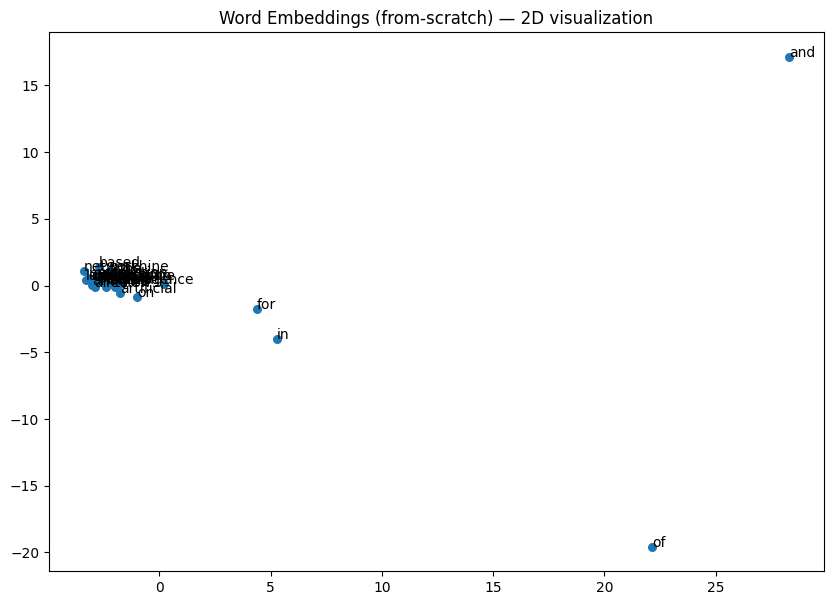


Cosine Similarities:
  research ↔ study      = 0.876
     model ↔ algorithm  = 0.906
      data ↔ analysis   = 0.532
    method ↔ approach   = 0.981
     solar ↔ energy     = 0.978


In [3]:

from google.colab import files
import pandas as pd
import numpy as np
import re, random
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Upload and preprocess dataset

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
text_col = [c for c in df.columns if df[c].dtype=='object'][0]
docs = df[text_col].dropna().astype(str).tolist()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text.split()

sentences = [preprocess(d) for d in docs if d.strip()]

# Build vocabulary
min_count = 2
freq = Counter([w for s in sentences for w in s])
vocab = [w for w,c in freq.items() if c>=min_count]
vocab2idx = {w:i for i,w in enumerate(vocab)}
idx2vocab = {i:w for w,i in vocab2idx.items()}
V = len(vocab)
print("Vocabulary size:", V)

# 2. Build training pairs

window = 2
pairs = []
for sent in sentences:
    tokens = [w for w in sent if w in vocab2idx]
    for i, w in enumerate(tokens):
        for j in range(max(0, i-window), min(len(tokens), i+window+1)):
            if i != j:
                pairs.append((vocab2idx[w], vocab2idx[tokens[j]]))
print("Training pairs:", len(pairs))

# 3. Initialize parameters

np.random.seed(42)
embed_dim = 300
W1 = np.random.uniform(-0.5/embed_dim, 0.5/embed_dim, (V, embed_dim))
W2 = np.random.uniform(-0.5/embed_dim, 0.5/embed_dim, (embed_dim, V))
lr = 0.05
epochs = 3

# 4. Train

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum(axis=0)

for ep in range(epochs):
    loss = 0
    random.shuffle(pairs)
    for center, context in pairs[:20000]:
        h = W1[center]
        u = np.dot(W2.T, h)
        y_pred = softmax(u)
        y_true = np.zeros(V)
        y_true[context] = 1.0
        e = y_pred - y_true
        W2 -= lr * np.outer(h, e)
        W1[center] -= lr * np.dot(W2, e)
        loss += -np.log(y_pred[context] + 1e-9)
    print(f"Epoch {ep+1}/{epochs} Loss={loss/len(pairs):.4f}")


word_vectors = W1

# 5. Visualize with PCA / t-SNE

top_words = [w for w,_ in freq.most_common(30) if w in vocab2idx][:30]
X = np.array([word_vectors[vocab2idx[w]] for w in top_words])
use_tsne = False
reducer = TSNE(n_components=2, init='pca', n_iter=1000, random_state=42) if use_tsne else PCA(n_components=2)
X_2d = reducer.fit_transform(X)

plt.figure(figsize=(10,7))
plt.scatter(X_2d[:,0], X_2d[:,1], s=30)
for i,w in enumerate(top_words):
    plt.annotate(w,(X_2d[i,0],X_2d[i,1]))
plt.title("Word Embeddings (from-scratch) — 2D visualization")
plt.show()

# 6. Cosine similarity helper

def cosine(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

pairs_to_check = [
    ("research","study"),
    ("model","algorithm"),
    ("data","analysis"),
    ("method","approach"),
    ("solar","energy"),
]
print("\nCosine Similarities:")
for a,b in pairs_to_check:
    if a in vocab2idx and b in vocab2idx:
        sim = cosine(word_vectors[vocab2idx[a]], word_vectors[vocab2idx[b]])
        print(f"{a:>10s} ↔ {b:<10s} = {sim:.3f}")
    else:
        print(f"{a},{b} not in vocab.")


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



https://github.com/raguram-3398/Raguram_INFO5731_Fall2025/blob/Assignments/annotated_sentiments_research_papers.csv


1.) Which NLP Task would you like to perform on your selected dataset (NER, Summarization, Sentiment Analysis, Text classification)

Analyzing the feelings expressed in a text and its categorization based on the content will be the closest natural language processing tasks to the annotated dataset given for the request.

Sentiment Analysis: The identification of the sentiment expressed in a text would be the central idea to which the whole project would be related, as the goal is to select the proper emotional category (positive, negative, or neutral) of the abstracts of scientific papers. The model will have to be taught to comprehend scientific research in general and identify the pieces of text that contain the author's opinion and convey a positive or neutral tone.

Text Classification: Sentiment analysis is one specific case of text classification. The broader goal is to first identify the sentiment of the research paper abstracts and then assign them to the corresponding class. An algorithm of either machine learning or deep learning, based on the annotated dataset, will create a model that will be able to associate the patterns and vocabulary that represent each sentiment class and then label the new abstracts it encounters.

2.) Explain the labeling Schema you have used and mention those labels

In annotating research paper abstracts, I would implement a three-label schema that comprises the following labels:

Labels: positive, negative, neutral

Labeling Schema Explanation:

Positive: An abstract is tagged as "positive" when one or more of the following statements can be identified in the text that support the results of the research positively:

Directly indicating that a method or model yields the best or state-of-the-art results when used for a particular task.

Highlighting substantially and noticeably major changes in a positive direction relative to the existing techniques.

Negatively: A research summary that is "negative" tells that the method has been unsuccessful. In the case of scientific papers, the sentiment identified is infrequently found in the abstracts, but, on the other hand, it might be there in papers that are figured out as addressing the problem of the existing approaches. Words like "fails," "shortcomings," "limitations," "unable to," or "poor performance" are some of the words that could be found in such research summaries.

Neutral: A research abstract is categorized "neutral" when the information to be delivered is presented in an unbiased way and with facts. This category is very typical for research abstracts and will cover:

Review articles that summarize the current status of a certain area without delivering any new, positive results.

Research paper abstracts describing a new method or study, but not yet having conclusive or overwhelmingly positive results to report.

Papers presenting a new dataset or resource without making any claims as to its impact.

Research paper abstracts that mostly talk about the method and research process rather than the results.

By defining the labels in this manner, the annotated dataset generated will become a good training resource for a robust sentiment analysis system that understands the characteristics and tone of scientific texts.

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
The task was quite difficult, but also a valuable learning experience. Every abstract had to be read and analyzed to figure out its sentiment, which called for a careful interpretation and consistency, and was sometimes a bit of a struggle. Nevertheless, the whole thing made me realize how NLP datasets in the real world are created and annotated, so I got to learn new text analysis and sentiment labeling techniques.

It was a bit of a stretch at the very beginning to figure out from scratch how to do N-gram analysis, TF-IDF weighting, and word embedding models without using any pre-built libraries, but it was very instructive—that is, it really deepened my understanding of the inner workings of these algorithms. Also, it helped a lot to see the embeddings and calculate the cosine similarities because it made the results more “real” and gave new insights.